# Домашнее задание 2

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 17 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_2

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

# Задача 1

Рассмотрим проекцию на единичном $\ell_1$-шар:
\begin{equation*}
    \text{proj}_{C}(x) = \arg\min_{y \in C} \|x-y\|^2,
\end{equation*}
где $C = \{x ~|~ \|x\|_1 \leq 1 \}$.

### __(а)__ Найдите выражение для такой проекции в явном виде.

Сделаем два облегчающих жизнь шага :

1)Если точка лежит в $l_1$ шаре, то тогда ответ очевиден
Будем тогда рассматривать точку $x:||x||_1>1$. 
Ясно, что в этом случае проекция будет лежать на границе $l_1$ - шара, значит достаточно рассмотреть минимизацию с ограничением типа равенства :

2)Достаточно рассмотреть проекцию точки только с положительными координатами. Тогда в случае если $i-$я координата будет отрицательной, можно рассмотреть ее зеркальное отражение по $i-$й оси, найти проекцию, а для проекции найти зеркальное отражение относительно $i-$й оси. (сфера симметрична относительно отражения координат)

Функция Лагранжа будет иметь вид :

### $$\mathcal{L}(y)=\frac{1}{2}||x-y||_2^2+\lambda(||y||_1-1)$$

Считая градиенты функции Лагранжа получаем систему уравнений $(1),(2)$ :

### $$(y-x)+\lambda \left(\frac{y_1}{|y_1|},\frac{y_2}{|y_2|},...,\frac{y_n}{|y_n|}\right)=0\;\;\;(1)$$ 

### $$||y||_1=1\;\;\;(2)$$

Выразим из этой системы лямбду : 

$y_i=\text{sgn}(x_i)\max(|x_i|-\lambda,0)=\max(x_i-\lambda,0)=(x_i-\lambda)_+$

Сложим модули этих равенств :

$1=\sum\limits_{i=1}^n(x_i-\lambda)_+$

$\sum\limits_{i=1}^n(x_i-\lambda)_+=1$

Решим такое уравнение при помощи метода сортировки для решения кусочно-линейных уравнений :

Без ограничения общности, будем считать что $x_i$ расположены в порядке возрастания : $x_1<...<x_n$

В таком случае будем поочередно перебирать $\lambda \in [x_i,x_{i+1}]$ переходя от интервала к интервалу. При переходе к новому интервалу следующая по номеру функция будет активироваться. Таким образом на одном из интервалов найдется лямбда

И тогда решение выпишется в виде

$y_i=\max(x_i-\lambda,0)$

### Сразу закодим оператор проекции

$\Sigma_{i=1}^nx_i-n\lambda=1 $ : i-й шаг

$\lambda=(\Sigma-1)/n$

In [1]:
import numpy as np
def proj_C(x):
    if (np.linalg.norm(x,1) <= 1) :
        return x
    
    #Проводим отражения координат вектора
    symm=[]

    for i in range(0,len(x)):
        if x[i]>=0:
            symm.append(1)
        else :
            symm.append(-1)
            x[i]=-x[i]
    
    
    #Ищем лямбду, считаем что все координаты положительные и точка не лежит внутри единичной l-1 сферы
    lam=0
    proj=[]
    x_sorted=np.copy(x)
    x_sorted.sort()
    x_sorted=np.flip(x_sorted)

    x_sorted=np.append(x_sorted,-np.inf)
    #Надо отладить
    for n in range(0,len(x_sorted)-1):
        lam=(sum(x_sorted[0:n+1])-1)/(n+1)
        if(lam <= x_sorted[n] and x_sorted[n+1] <= lam):
            break
    
    #Теперь у нас есть lambda

    for i in range(0,len(x)):
        proj.append(max(x[i]-lam,0))

    #Проводим обратные отражения :
    for i in range(0,len(x)):
        proj[i]=proj[i]*symm[i]
    
    return proj;
        
    

In [2]:
x=[0.5,0.50000001]
proj_C(x)

[0.49999999500000003, 0.5000000050000001]

### __(б)__ Сравните:
\begin{equation*}
    \text{proj}_C (x) \quad \text{и} \quad \text{prox}_{\lambda \mathbb{I}_C} (x),
\end{equation*}
где $\lambda > 0$, а $\mathbb{I}_C$ - индикаторная функция множества $C$:
$$
\mathbb{I}_C = 
\begin{cases}
0 ,& x \in C \\
+\infty, &x \notin C.
\end{cases}
$$
Являются ли данные операторы эквивалентными для любых $\lambda > 0$ и выпуклых $C$?

Зафиксируем произвольное лямбда больше нуля и выпуклое $C$

$$\text{prox}_{\lambda\mathbf{1}_C}(x)=\text{argmin}_{y\in \mathbf{R}^d} \left(\frac{1}{2}||x-y||^2+\lambda\mathbf{1}_C(y)) \right)$$

Если $y\notin C$, то индикаторная функция принимает бесконечность и аргминимум пустой.Значит

$$\text{prox}_{\lambda\mathbf{1}_C}(x)=\text{argmin}_{y\in C}\left(\frac{1}{2}||x-y||^2 \right)$$

Что совпадает с оператором проекции

## Задача 2

Рассмотрим задачу минимизации эмпирического риска:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n l (g(w, x_i), y_i),
\end{equation}
где $l$ - функция потерь, $g$ - модель, $w$ - параметры модели, $\{x_i, y_i\}_{i=1}^n$ - выборка данных из векторов признаков $x_i$ и меток $y_i$.

Далее будем рассматривать линейной модель $g(w, x) = w^T x$ и квадратичную функцию потерь $l(z, y) = (z-y)^2$.

## __(а)__ Запишите задачу минимизации эмпирического риска с линейной моделью  и квадратичной функцией потерь в векторно-матричном виде, используя $X$ - матрицу из векторов $\{x_i\}$ и вектор $y$ - из $\{y_i\}$.

$$ \min_{w\in R^d}\frac{1}{n} \left< \omega^T X -y, \omega^T X -y \right>$$

## __(б)__ К заданию приложен датасет _mushrooms_. С помощью следующего кода сформируйте матрицу $X$ и вектор $y$:

In [3]:
dataset = "mushrooms.txt" 
#файл должен лежать в той же деректории, что и notebook

In [4]:
from sklearn.datasets import load_svmlight_file
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape

In [5]:
len(X[1])

112

In [6]:
y

array([1., 2., 2., ..., 2., 1., 2.])

In [7]:
len(X)

8124

In [8]:
len(y)

8124

Разделите (лучше случайно) данные (а значит $X$ и $y$) на две части: обучающую и тестовую (примерно в отношении $4$ к $1$). Опишите, как это было сделано.

Достану функцию из sklearn :

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.2,test_size=0.8, random_state=42)

## __(в)__ Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$ задачи обучения/оптимизации. Будет ли задача выпуклой? Сильно выпуклой?

Сведем эту функцию к квадратичной функции из первого домашнего задания: (на 1/n пока закроем глаза)

$$(y-X\omega)^T(y-X\omega)=(y^T-\omega^TX^T)(y-X\omega)=y^Ty-\omega^TX^Ty-y^TX\omega+\omega^TX^TX\omega$$

Поскольку минимизация происходит по омеге, на $y^Ty$ можно закрыть глаза, т.к. это некоторая константа

$\omega^T X^TX \omega-\left<X\omega,y\right>-\left<y,X\omega\right>+y^Ty=\omega^TX^TX\omega-2\left<(y^TX)\omega \right>=\frac{1}{2}x^TAx-b^Tx$, где

$A=2\times X^TX,\;\; b^T=2*y^TX$

In [11]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [12]:
A=2*np.matmul(X_train.T,X_train)
b=2*np.matmul(y_train.T,X_train)

Проверим положительную полуопределенность :

In [13]:
np.all(np.linalg.eigvals(A)+0.00000001 >= 0)

True

Значит задача будет выпуклой _(можно было это понять и из теоретических соображений, где-то в линале или вычебре были рассуждения про то что $X^TX$ симметричная и положительно определенная; еще можно это понять потому что исходная функция - квадрат второй нормы от выпуклой функции)_

При этом строгой определнности не будет :

In [14]:
np.all(np.linalg.eigvals(A)>0)

False

_Опять же в курсах до этого были контрпримеры на тот факт, что $X^TX$ не обязана быть строго положительно определенной_

Константа L:

In [15]:
np.linalg.norm(A)

34732.10445682784

## __(г)__ Используя материалы прошлого ДЗ (по желанию), решите задачу оптимизации/обучите модель машинного обучения с помощью градиентного спуска. Изобразите график сходимости. Какой критерий сходимости будет использовать? Сделайте вывод. Опишите проблемы, с которыми пришлось столкнуться.

In [16]:
ITERATIONS=1000  #Максимальное число итераций
EPSILON=0.0001   #Точность 

In [17]:
def gradient_decline_iteration(x_k,gamma_k,A,b):
    x_new=x_k-gamma_k*gradient(A,b,x_k);
    return x_new;

def gradient_decline(A,b,x,gamma,iterations,epsilon):
    x_prev=x
    arr=[]
    for i in range(iterations):
        x_prev=x
        x=gradient_decline_iteration(x,gamma,A,b)
        arr.append(np.linalg.norm(x-x_prev))
        if(np.linalg.norm(x-x_prev) < epsilon):
            break
    return x,arr

def gradient(A,b,x):
    return np.matmul(A,x)-np.transpose(b);

zero=np.zeros(len(A))

In [18]:
x,arr=gradient_decline(A,b,zero,1/np.linalg.norm(A),ITERATIONS,EPSILON)

In [19]:
import matplotlib.pyplot as plt

#arr = [1, 2, 3, 4, 5]
#почему-то чтобы график прогрузился нужно запустить ячейку еще раз
plt.plot(range(len(arr)), arr)
plt.xlabel("Iteration number")
plt.ylabel("||x_new-x_old||, log scale")
plt.yscale('log')
plt.show()

## __(д)__ Как использовать итоговую модель для предсказания? Ответив на вопрос, сделайте предсказания на тестовой выборке. Сравните с реальными метками. Количество правильно угаданных меток есть точность/accuracy вашей модели. Запустите еще раз процесс обучения из пункта г), постройте как меняется точность модели от номера итерации градиентного спуска (измеряйте не каждую итерацию, а, например, каждую 100 или 1000). 

Теперь у нас есть набор параметров $\omega$ при котором функционал ошибки (приближенно) принимает наименьшее значение. Ответы будем получать по формуле $g=w^tx$. Теперь устроим тест

Будем считать что ответ засчитан, если в результате нам сказали правильный ответ с точностью 0.1

In [20]:
Delta=0
Accuracy_error=0.1
y_pred=[]
for i in range(len(X_test)):
    y_pred.append(np.matmul(x.T,X_test[i]))
    
for i in range(len(y_pred)):
    if(abs(y_pred[i]-y_test[i])<Accuracy_error):
        Delta+=1

Процент правильно отгаданнных ответов 

In [21]:
print("При количестве итераций N = {}, процент правильных ответов составил {}%".format(ITERATIONS,Delta/(len(y_test))*100))

При количестве итераций N = 1000, процент правильных ответов составил 92.92307692307692%


In [22]:
x

array([-0.04053243, -0.00747963,  0.0471909 ,  0.03779075,  0.0979805 ,
        0.04235906,  0.07448408,  0.06473025, -0.04053243,  0.07862725,
        0.06103248, -0.06320738,  0.03541855,  0.02541648,  0.03482091,
       -0.06680151,  0.05071311,  0.05211098,  0.00326133,  0.04454421,
        0.07527554,  0.10203361,  0.41222928, -0.33058898, -0.15627499,
       -0.03791201,  0.40422322,  0.42749091, -0.28337122, -0.1299391 ,
       -0.12854796,  0.07208037,  0.10522878,  0.02548719,  0.15182196,
        0.22948354, -0.05217439, -0.03290994,  0.07014625,  0.01400755,
        0.01987752,  0.03759999,  0.0296651 ,  0.03937681,  0.03489848,
       -0.10867651,  0.03695388,  0.03016081,  0.00620921,  0.13091479,
        0.04639436,  0.04102211,  0.06214946,  0.03429232,  0.03984526,
       -0.03285129,  0.06295051,  0.06046103,  0.08674889, -0.03791201,
        0.01088352,  0.0717185 ,  0.0157141 ,  0.07797361,  0.01323568,
        0.01300976,  0.01268599,  0.        , -0.03791201,  0.02

### Теперь будем играться с различным числом итераций и различными точностями :

In [32]:
norm=np.linalg.norm(A)
percentage=[]
max_iterations=2000
step=100
for i in range(0,max_iterations,step):
    ITERATIONS=i
    x,arr=gradient_decline(A,b,zero,1/norm,ITERATIONS,EPSILON)
    
    y_pred=[]
    for i in range(len(X_test)):
        y_pred.append(np.matmul(np.transpose(x),X_test[i]))
        
    Delta=0
    EPSILON_ANSWER=0.1
    for i in range(len(y_pred)):
        if(abs(y_pred[i]-y_test[i])<EPSILON_ANSWER):
            Delta+=1
    percentage.append(Delta/len(y_test))

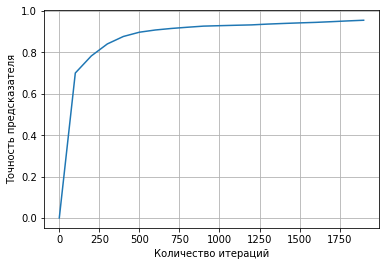

In [33]:
import matplotlib.pyplot as plt

#arr = [1, 2, 3, 4, 5]
xaxis=np.arange(0,len(percentage),1) 
xaxis*=step

plt.plot(xaxis, percentage)

plt.xlabel("Количество итераций")
plt.ylabel("Точность предсказателя")
plt.grid()
plt.show()

### __(e)__ Теперь рассмотрим эту же задачу обучения на $\ell_1$-шаре с радиусом $\lambda$. Повторите пункты г) и д) только теперь градиентный спуск должен быть модифицирован с помощью оператора проекции. Пробуйте различные $\lambda > 0$ и найдите лучшее (опишите почему именно такое лучшее). Удалось ли улучшить процесс обучения/точность модели на тестовой выборке? 

### $$ \min_{w\in B_{\mathcal{l}_1}} \left< \omega^T X -y, \omega^T X -y \right>$$

Немного модифицируем нашу проекцию для того чтобы проектировать на шар произвольного радиуса :
Масштабируем задачу - уменьшим координаты точки в $R$ раз, спроецируем эту точку на $l_1$ сферу единичного радиуса и затем раздуем координаты проекции обратно в $R$ раз (по сути меняется масштаб задачи, а геометрические соотношения которыми определяется проекциями останутся такими-же,т.к. все размеры меняются соответственно)

In [34]:
def proj_CR(x,R):
    x=x/R
    projection=np.array(proj_C(x))
    projection*=R
    return projection

In [35]:
def gradient_decline_iteration(x_k,gamma_k,A,b,lam):
    x_new=proj_CR(x_k-gamma_k*gradient(A,b,x_k),lam);
    return x_new;

def gradient_decline(A,b,x,gamma,iterations,epsilon,lam):
    x_prev=x
    arr=[]
    for i in range(iterations):
        x_prev=x
        x=gradient_decline_iteration(x,gamma,A,b,lam)
        arr.append(np.linalg.norm(x-x_prev))
        if(np.linalg.norm(x-x_prev) < epsilon):
            break
    return x,arr


zero=np.zeros(len(A))

In [36]:
ITERATIONS=1000
EPSILON=0.0001
LAM=5

x,arr=gradient_decline(A,b,zero,1/np.linalg.norm(A),ITERATIONS,EPSILON,LAM)

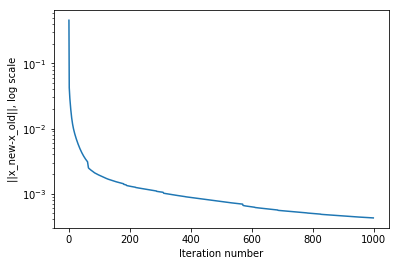

In [37]:
import matplotlib.pyplot as plt

#arr = [1, 2, 3, 4, 5]


plt.plot(range(len(arr)), arr)
plt.xlabel("Iteration number")
plt.ylabel("||x_new-x_old||, log scale")
plt.yscale('log')
plt.show()

In [38]:
Delta=0
Accuracy_error=0.1
y_pred=[]
for i in range(len(X_test)):
    y_pred.append(np.matmul(x.T,X_test[i]))
    
for i in range(len(y_pred)):
    if(abs(y_pred[i]-y_test[i])<Accuracy_error):
        Delta+=1

In [39]:
print("При параметре lambda = {}, количестве итераций N = {}, процент правильных ответов составил {}%".format(LAM,ITERATIONS,Delta/(len(y_test))*100))

При параметре lambda = 5, количестве итераций N = 1000, процент правильных ответов составил 91.73846153846154%


Попробуем при различных лямбдах :

In [40]:
lambdas=[0.5,1,5,15,30]
percentage_all=[]

for LAM in lambdas:
    norm=np.linalg.norm(A)
    percentage=[]
    for i in range(0,1000,100):
        ITERATIONS=i
        x,arr=gradient_decline(A,b,zero,1/norm,ITERATIONS,EPSILON,LAM)
        
        y_pred=[]
        for i in range(len(X_test)):
            y_pred.append(np.matmul(x.T,X_test[i]))
        
        Delta=0
        Accuracy_error=0.1
        for i in range(len(y_pred)):
            if(abs(y_pred[i]-y_test[i])<Accuracy_error):
                Delta+=1
        percentage.append(Delta/len(y_test))
    percentage_all.append(percentage)

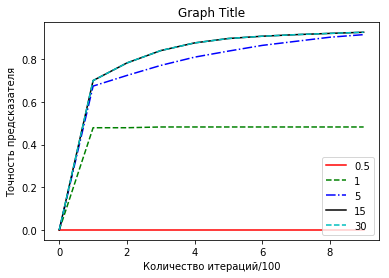

In [41]:
import matplotlib.pyplot as plt

# Создание массива данных

# Создание графика и задание цветов линий и легенды
fig, ax = plt.subplots()
linestyles = ['-', '--', '-.','-', '--', '-.']
colors = ['red', 'green', 'blue','black','c']
labels = lambdas

# Нанесение массивов percentage на график
for i in range(len(percentage_all)):
    ax.plot(percentage_all[i], color=colors[i], label=labels[i],linestyle=linestyles[i % len(linestyles)])

# Оформление графика
ax.set_xlabel('Количество итераций/100')
ax.set_ylabel('Точность предсказателя')
ax.set_title('Graph Title')
ax.legend()

# Отображение графика
plt.show()

Оптимальным будет тот радиус, который обрубает первые шаги, "насильно проецируя" точку на сферу. Но если выбрать сферу слишком маленького радиуса, то тогда оптимум будет лежать вне этой точки и градиентный метод будет пытаться выйти за границу сферы по антиградиенту, но проекция будет утаскивать его назад. Это видно при маленьких радиусах шара.

Процесс обучения улучшить при помощи проекции не удалось, в случае без проекции accuracy растет лучше всего - 92.92%, тогда как у методов с проекцией :

In [42]:
for i in range (len(percentage_all)):
    print(percentage_all[i][-1])

0.0
0.4827692307692308
0.9158461538461539
0.9270769230769231
0.9270769230769231


т.е. хуже или так же